## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm  
sns.set_style('darkgrid')
sns.set_context('talk')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Reading Excel Data

In [4]:
df=pd.read_excel(r"...\Complete Data for Modeling.xlsx", "MBA Real Data")
df = df.set_index('Date')
df.fillna(0, inplace=True)
df.replace(np.inf, 0)
df.drop("Academic Year", axis=1, inplace=True)
df.head() # Show the first 5 rows in the data

,MBA_course_registration,MBA_Tuition,WCS,UnempRate,Weekly_Earnings
Date,,,,,
2005-01-01,775.0,3287.530628,38.921188,0.054836,986.607963
2005-02-01,164.0,3282.658439,37.568936,0.055594,1000.102456
2005-03-01,686.0,3267.590858,47.994795,0.052586,958.965719
2005-04-01,18.0,3247.862387,40.542733,0.051753,975.751993
2005-05-01,515.0,3248.749513,35.899663,0.050605,980.651975


In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [12]:
X=df[['MBA_course_registration','MBA_Tuition','UnempRate','Weekly_Earnings']]
calc_vif(X)

,variables,VIF
0,MBA_course_registration,2.169687
1,MBA_Tuition,208.621115
2,UnempRate,45.759192
3,Weekly_Earnings,298.663086


## Exploring the Data

### Plotting each variable/columns in the dataset by date

MBA_course_registration


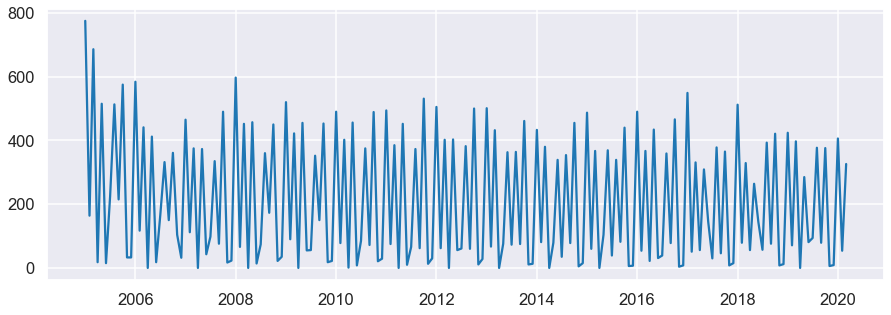

MBA_Tuition


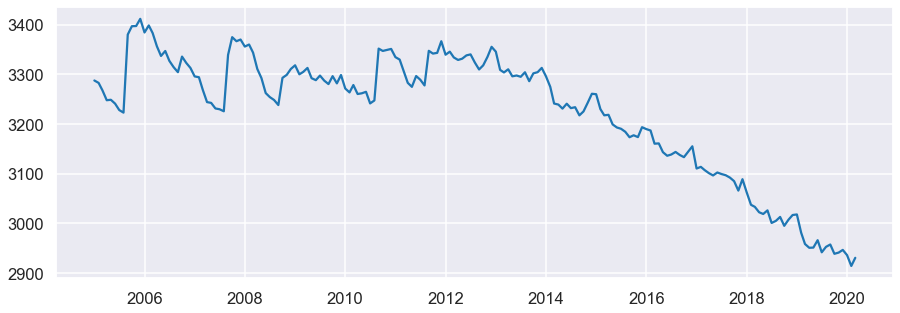

WCS


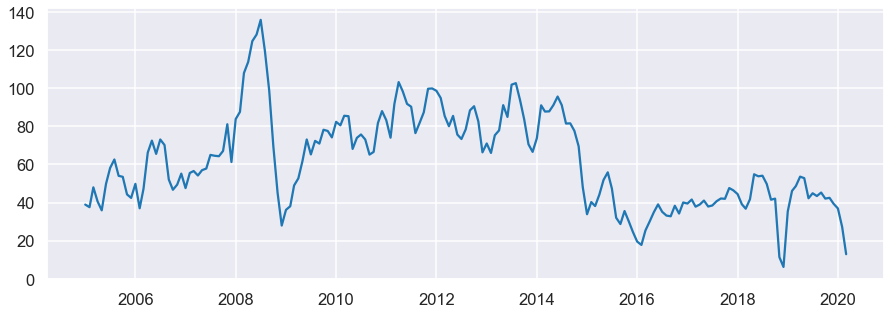

UnempRate


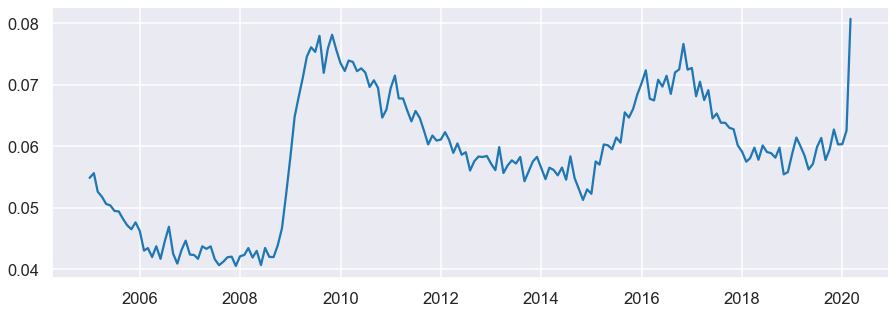

Weekly_Earnings


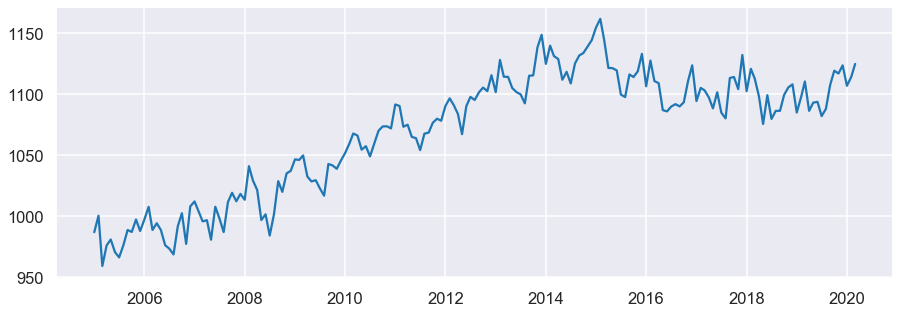

In [3]:
# This loops the plot for by columns in the data set
for c in df.columns:
    plt.figure(figsize=(15,5))
    plt.plot(df[c])
    print(c)
    plt.show()

### Checking the distribution of the variables using histograms

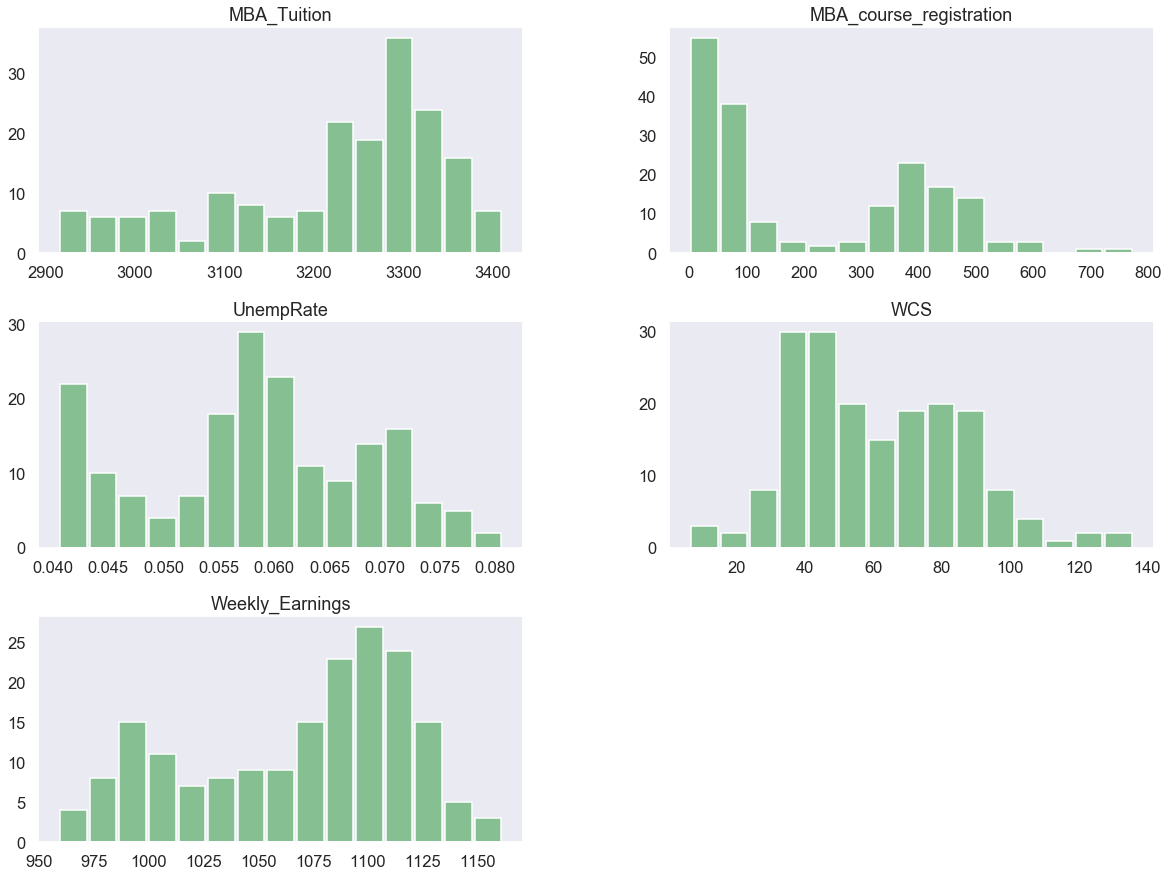

In [4]:
df.hist(bins=15, grid=False, figsize=(20,15), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

### Generating a correlation matrix for the variables

In [5]:
import pingouin as pg
df.rcorr(method='pearson', padjust='holm')

,MBA_course_registration,MBA_Tuition,WCS,UnempRate,Weekly_Earnings
MBA_course_registration,-,,,,
MBA_Tuition,0.061,-,***,***,***
WCS,0.005,0.533,-,,
UnempRate,-0.033,-0.28,-0.187,-,***
Weekly_Earnings,-0.14,-0.435,-0.158,0.496,-


from scipy.stats import pearsonr
sns.set_style('white')
sns.set_context('talk')

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.annotate('p = {:.2f}'.format(p), xy=(0.5,0.3), xycoords='axes fraction', ha='center')
    ax.set_axis_off()
    
g = sns.PairGrid(train_df)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

### Normalizing Data

The distribution plots of the data show that the variables are of different scales. The purpose normalizing the data is to standardize the scale for all the variables

In [3]:
from sklearn.preprocessing import MinMaxScaler

#sc_in = MinMaxScaler(feature_range=(0, 1))

np.where(df.values >= np.finfo(np.float64).max)

# Log transforamtion
df_log=np.log(df)
print("df_log")
print(df_log.tail())
print("")
print("")

df_log
            MBA_course_registration  MBA_Tuition       WCS  UnempRate  \
Date                                                                    
2019-11-01                 1.791759     7.986676  3.748837  -2.769450   
2019-12-01                 2.197225     7.988509  3.671788  -2.808936   
2020-01-01                 6.006353     7.984951  3.607893  -2.808322   
2020-02-01                 3.988984     7.977506  3.300560  -2.772232   
2020-03-01                 5.786897     7.983099  2.552565  -2.517446   

            Weekly_Earnings  
Date                         
2019-11-01         7.018131  
2019-12-01         7.024068  
2020-01-01         7.009078  
2020-02-01         7.015475  
2020-03-01         7.025129  




### Understanding the Time Series data

#### Decomposing series into trend, seasonality and random nose and checking for stationariity using Augmented Dickey Fuller (ADF) test

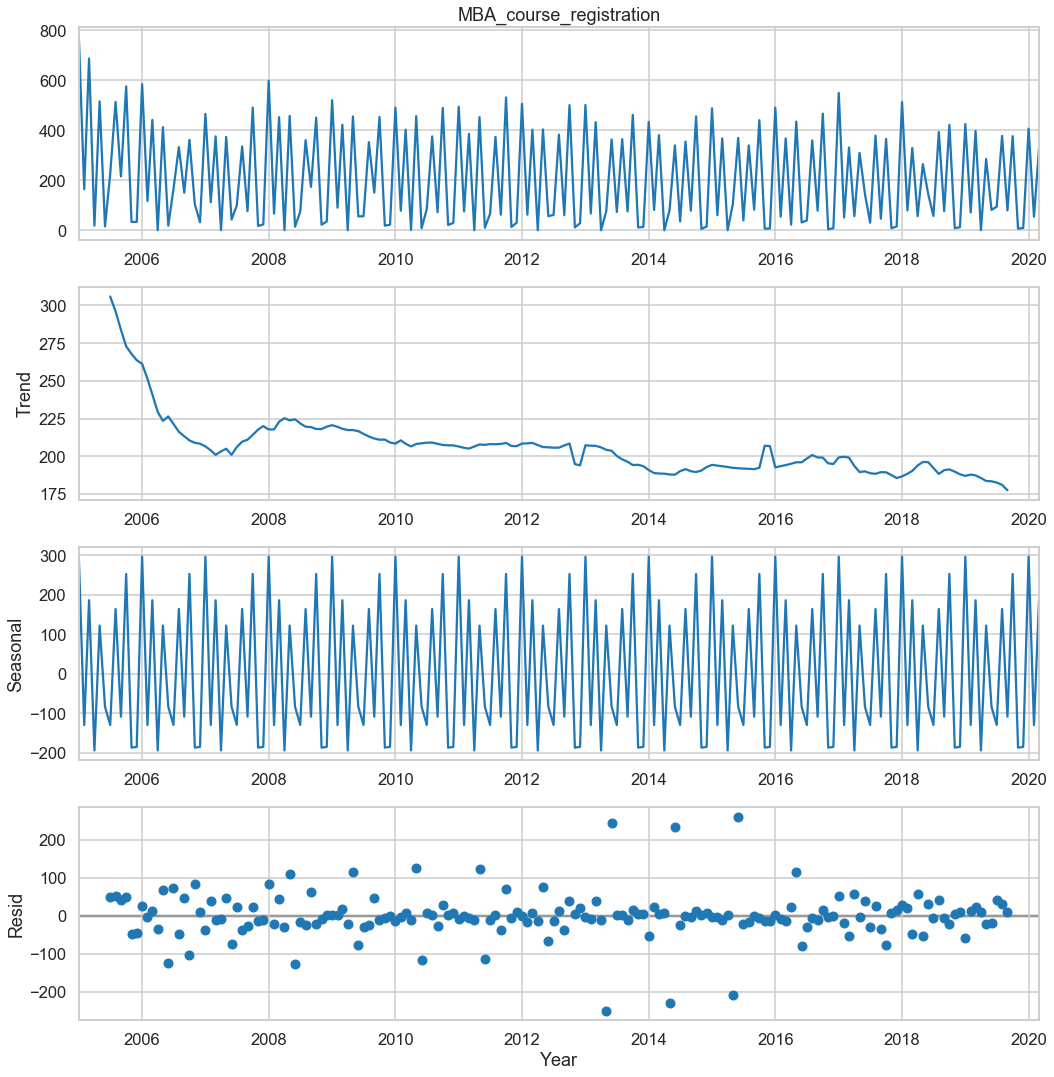

MBA_course_registration - Results of Dickey-Fuller Test:
ADF Statistic: -5.336874
p-value: 0.000005
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576

MBA_course_registration - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.685464
p-value: 0.014867
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


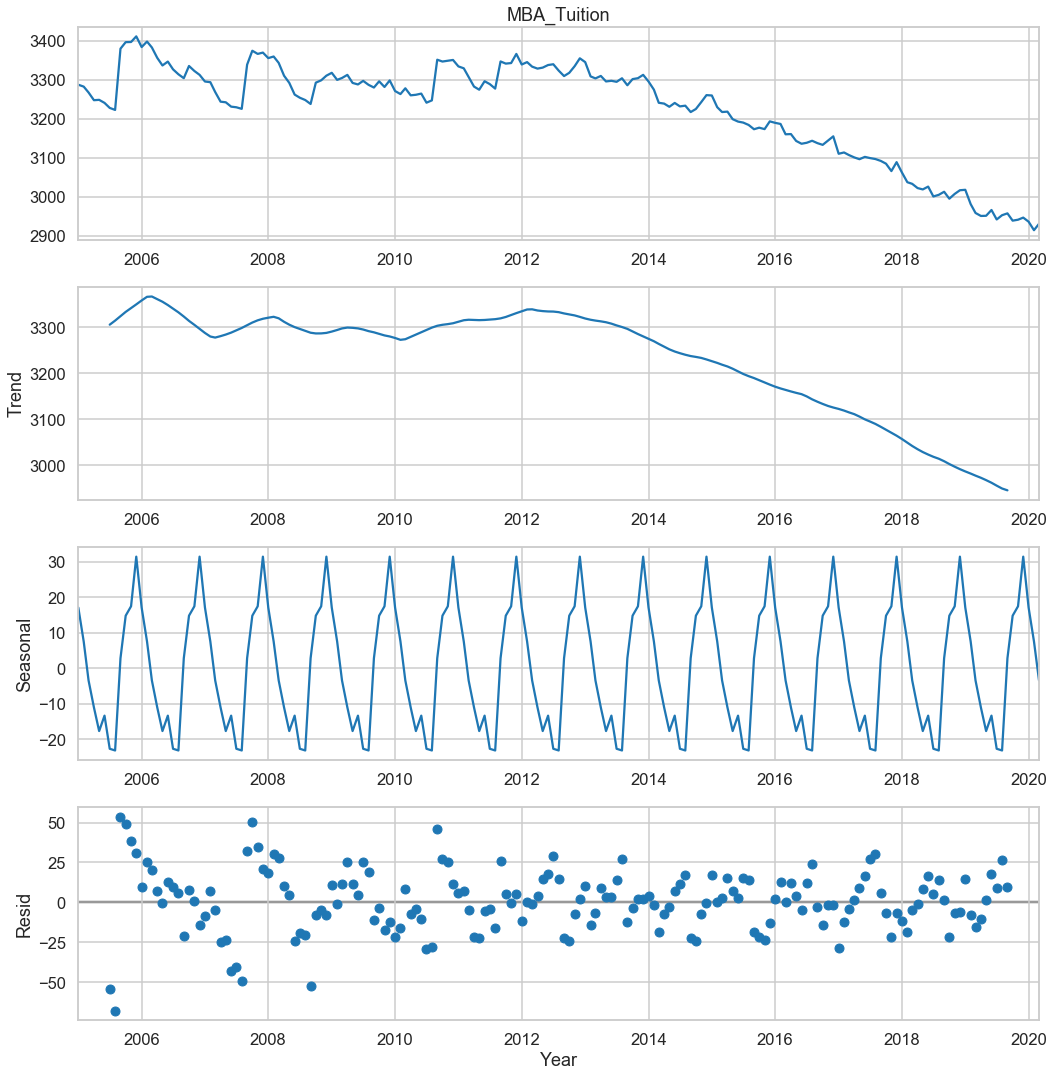

MBA_Tuition - Results of Dickey-Fuller Test:
ADF Statistic: 1.413243
p-value: 0.997173
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576

MBA_Tuition - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 1.012772
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


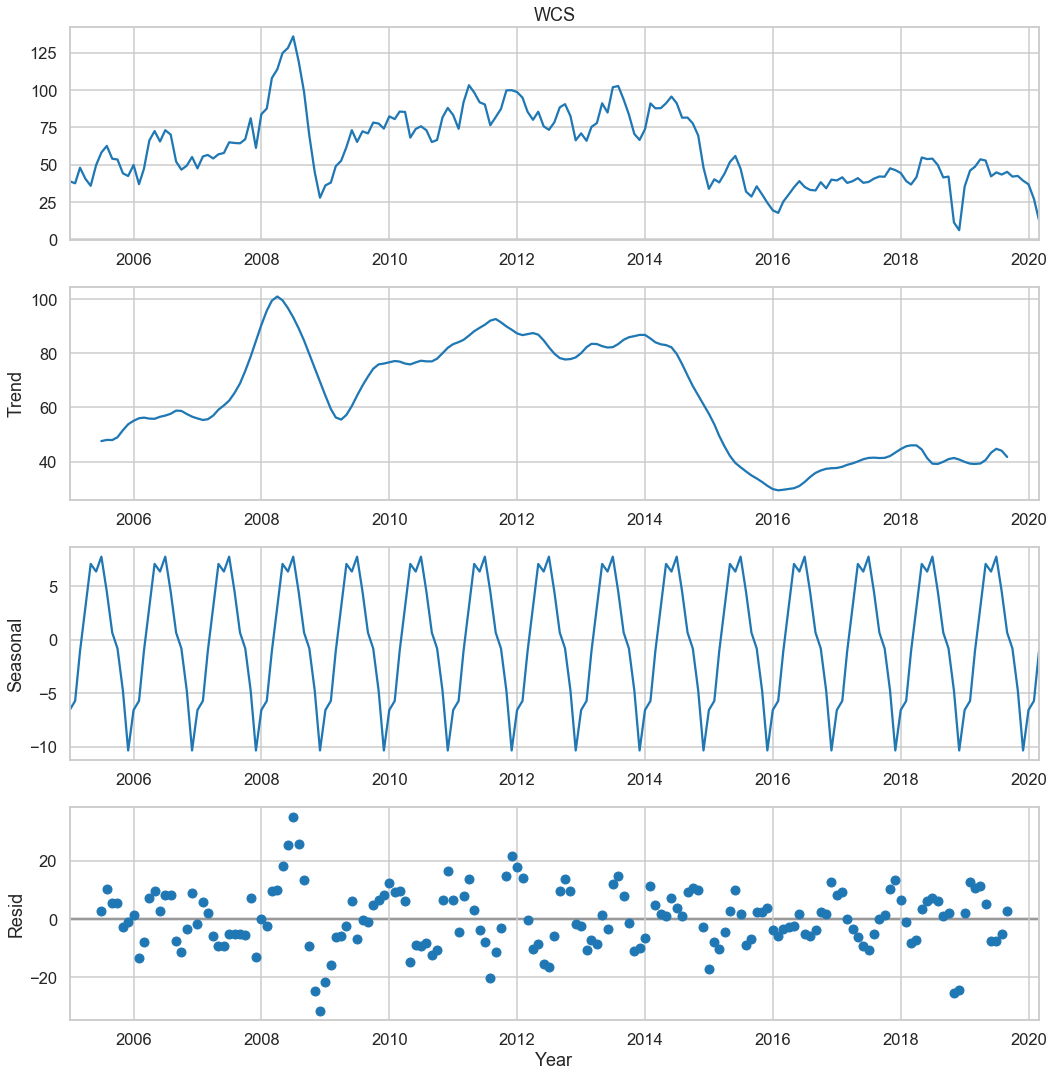

WCS - Results of Dickey-Fuller Test:
ADF Statistic: -2.961252
p-value: 0.038675
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575

WCS - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.493074
p-value: 0.043227
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


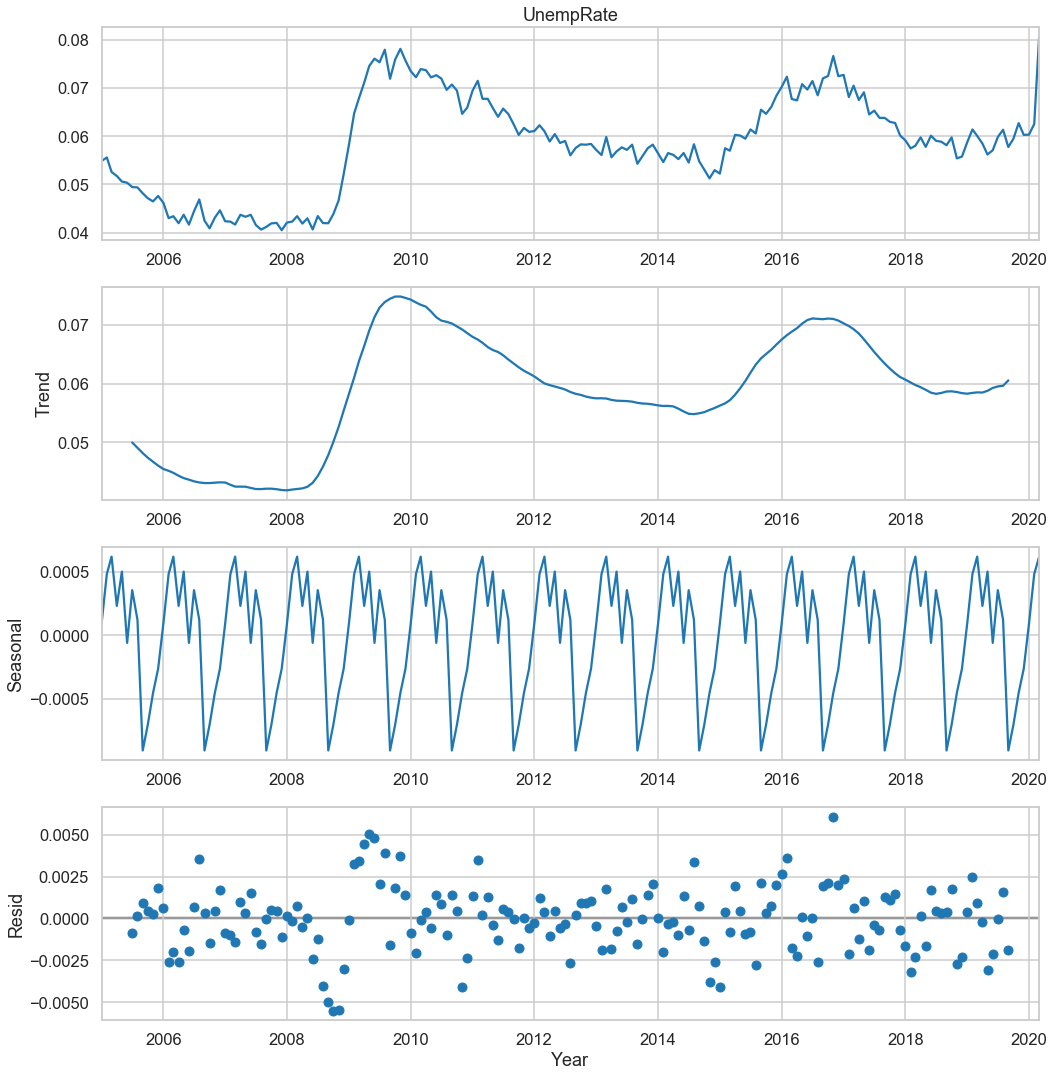

UnempRate - Results of Dickey-Fuller Test:
ADF Statistic: -1.926633
p-value: 0.319638
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576

UnempRate - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 0.416166
p-value: 0.070187
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


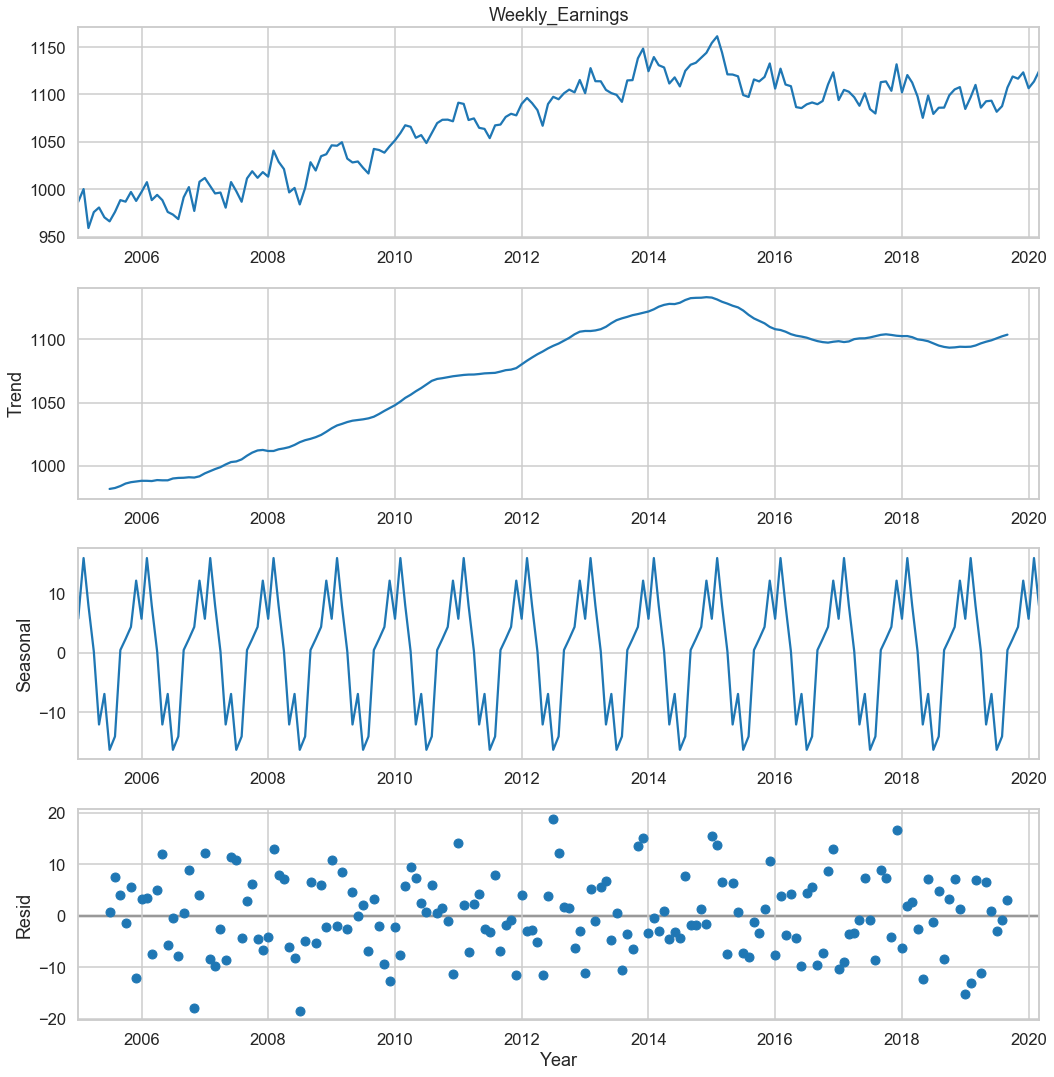

Weekly_Earnings - Results of Dickey-Fuller Test:
ADF Statistic: -1.602821
p-value: 0.482176
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576

Weekly_Earnings - Results Kwiatkowski-Phillips-Schmidt-Shin:
KPSS Statistic: 1.093356
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
None


C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [7]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

sns.set_style('whitegrid')
sns.set_context('talk')

rcParams['figure.figsize'] =15, 15

def decomp(df):
    decomposition = sm.tsa.seasonal_decompose(df, 
                                              model = 'additive')  
    fig = decomposition.plot()
    plt.xlabel('Year')
    plt.show()
    
    print (f'{c} - Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    print('ADF Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print('Critical Values:')
    for key, value in dftest[4].items():
        print('\t%s: %.3f' % (key, value))
    print("")  
    print (f'{c} - Results Kwiatkowski-Phillips-Schmidt-Shin:')
    dftest = kpss(df)
    print('KPSS Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print('Critical Values:')
    for key, value in dftest[3].items():
        print('\t%s: %.3f' % (key, value))

for c in df.columns: 
    print(decomp(df[c]))

## Building the Model

In [5]:
# Split data into Train and Test
train_start_dt = '2009-01-01'
train_end_dt = '2018-12-31'
test_end_dt = '2020-03-31'

train_df = df.loc[train_start_dt:train_end_dt]
test_df = df.loc[train_end_dt:test_end_dt]

train_log = df_log.loc[train_start_dt:train_end_dt]
test_log = df_log.loc[train_end_dt:test_end_dt]

print("Train Log Data")
print(train_log.tail(12))
print("")
print("")

print("Test Log Data")
print(test_log)



Train Log Data
            MBA_course_registration  MBA_Tuition       WCS  UnempRate  \
Date                                                                    
2018-01-01                 6.238325     8.026957  3.794067  -2.828213   
2018-02-01                 4.369448     8.018827  3.665918  -2.856582   
2018-03-01                 5.796058     8.017456  3.604734  -2.846859   
2018-04-01                 4.025352     8.013871  3.731333  -2.817655   
2018-05-01                 5.575949     8.012723  4.004622  -2.851199   
2018-06-01                 4.969813     8.015121  3.985187  -2.811773   
2018-07-01                 4.043051     8.006731  3.990711  -2.829509   
2018-08-01                 5.973810     8.008118  3.907613  -2.832766   
2018-09-01                 4.330733     8.010749  3.725737  -2.845255   
2018-10-01                 6.042633     8.004814  3.738939  -2.817821   
2018-11-01                 2.079442     8.008914  2.426434  -2.893141   
2018-12-01                 2.484907 

In [9]:
train_df.rcorr(method='pearson', padjust='holm')

,MBA_course_registration,MBA_Tuition,WCS,UnempRate,Weekly_Earnings
MBA_course_registration,-,,,,
MBA_Tuition,0.041,-,***,,
WCS,0.029,0.707,-,,
UnempRate,0.023,0.023,-0.153,-,***
Weekly_Earnings,-0.1,-0.242,-0.232,-0.648,-


### Preliminary Multiple Regression

In [10]:
import statsmodels.formula.api as smf
reg = smf.ols('MBA_course_registration ~ MBA_Tuition + Weekly_Earnings + UnempRate', data=train_df).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     MBA_course_registration   R-squared:                       0.013
Model:                                 OLS   Adj. R-squared:                 -0.012
Method:                      Least Squares   F-statistic:                    0.5180
Date:                     Sat, 16 May 2020   Prob (F-statistic):              0.671
Time:                             22:00:37   Log-Likelihood:                -799.50
No. Observations:                      120   AIC:                             1607.
Df Residuals:                          116   BIC:                             1618.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1283.9532   1326.673      0.968      0.335   -1343.689    3911.595
MBA_Tuition         0.0143      0.179      0.080      0.936      -0.341       0.369
Weekly_Earnings    -0.9168      0.804     -1.141      0.256      -2.509       0.675
UnempRate       -2003.0304   3461.047     -0.579      0.564   -8858.069    4852.008
==============================================================================
Omnibus:                      743.620   Durbin-Watson:                   3.217
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.216
Skew:                           0.414   Prob(JB):                     0.000496
Kurtosis:                       1.464   Cond. No.                     6.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

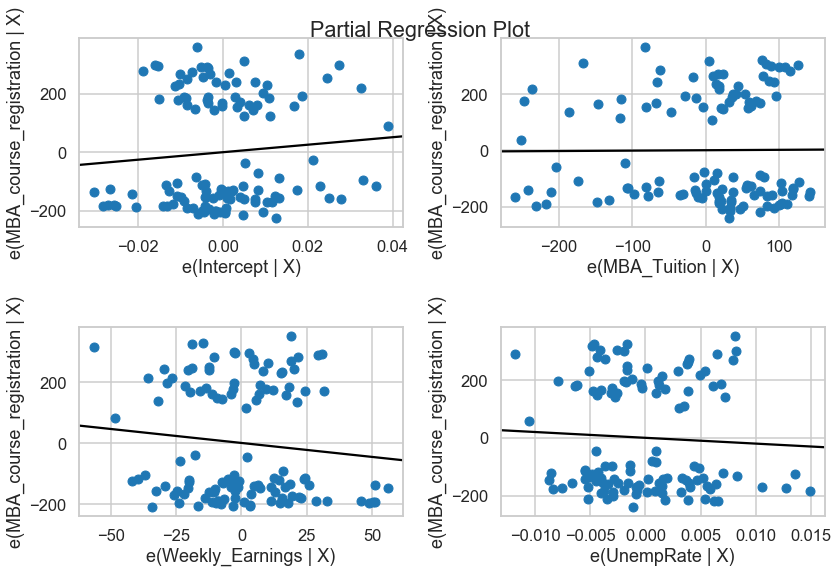

In [11]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg, fig=fig)

In [12]:
results = pd.DataFrame({'Actual_MBA_course_registration': train_df['MBA_course_registration'],
                        'resids': reg.resid,
                        'std_resids': reg.resid_pearson,
                        'fitted': reg.predict()})

print(results.head())

            Actual_MBA_course_registration      resids  std_resids      fitted
Date                                                                          
2009-01-01                           520.0  264.293494    1.372418  255.706506
2009-02-01                            90.0 -152.700820   -0.792942  242.700820
2009-03-01                           422.0  188.778521    0.980285  233.221479
2009-04-01                             0.0 -242.738885   -1.260490  242.738885
2009-05-01                           455.0  215.837377    1.120796  239.162623


### Check if some transformation is needed to make the distribution normal

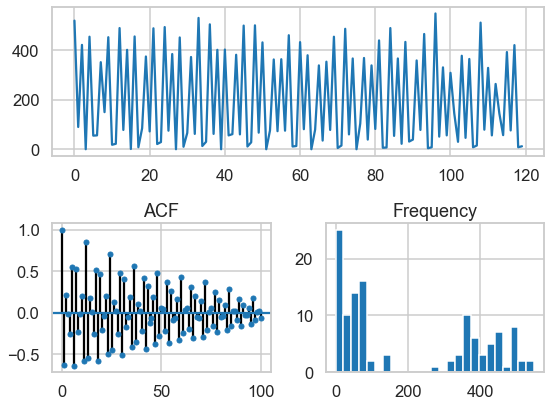

In [13]:
# Original distribution
from pmdarima.utils import tsdisplay

tsdisplay(train_df['MBA_course_registration'], lag_max=100)

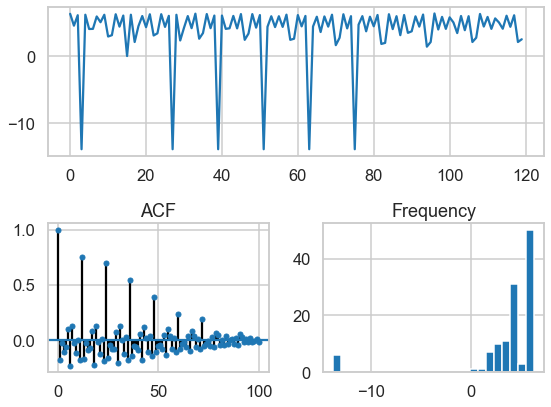

In [14]:
# Log transformed distribution
from pmdarima.preprocessing import LogEndogTransformer

y_train=train_df['MBA_course_registration']
y_train_log, _ = LogEndogTransformer(lmbda=1e-6).fit_transform(y_train)
tsdisplay(y_train_log, lag_max=100)

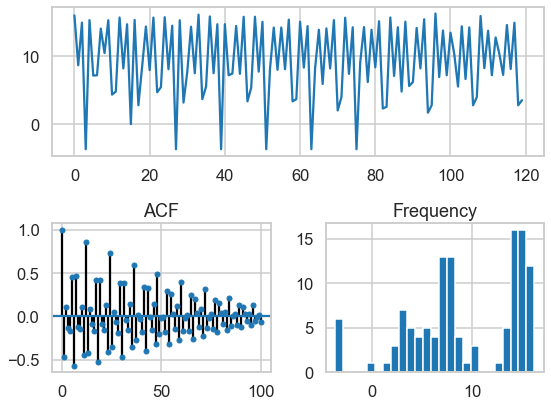

In [15]:
# Box-Cox transformed distribution
from pmdarima.preprocessing import BoxCoxEndogTransformer

y_train= train_df['MBA_course_registration']
y_train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y_train)
tsdisplay(y_train_bc, lag_max=100)

### Determining parameter values to use in the SARIMAX model

The decomposition and ADF test of the data shows there are trend and seasonal components. Using auto_arima we are able to grid search for paramerters (p,q,d) that will take care of the trend and seasonality of our data.

In [45]:
from pmdarima.arima import auto_arima


step_wise=auto_arima(train_df['MBA_course_registration'],
                     exogenous=train_df[['MBA_Tuition' , 'Weekly_Earnings', 'UnempRate']],
                     seasonal=True, m=12,
                     trace=True,
                     error_action='ignore',
                     suppress_warnings=True,
                     stepwise=True)
step_wise.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(1, 1, 1, 12) (constant=True); AIC=1185.939, BIC=1215.442, Time=2.854 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=1231.499, BIC=1244.909, Time=0.172 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=1209.106, BIC=1227.881, Time=0.925 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=1184.737, BIC=1203.512, Time=1.164 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=1229.499, BIC=1240.227, Time=0.124 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=1187.374, BIC=1203.467, Time=0.305 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=1175.843, BIC=1197.300, Time=1.844 seconds
Near non-invertible roots for order (0, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.990)
Fit ARIMA: (0, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=1178.909, BIC=1200.366, Time=3.219 seconds
Near 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -579.922
Date:                            Sat, 16 May 2020   AIC                           1175.843
Time:                                    22:36:24   BIC                           1197.300
Sample:                                01-01-2009   HQIC                          1184.543
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           1.9620      1.795      1.093      0.274      -1.556       5.480
MBA_Tuition         0.1072      0.058      1.863      0.062      -0.006       0.220
Weekly_Earnings    -0.4579      0.167     -2.749      0.006      -0.784      -0.131
UnempRate        -355.5590    556.541     -0.639      0.523   -1446.360     735.242
ma.L1              -0.8359      0.114     -7.325      0.000      -1.060      -0.612
ar.S.L12            0.4490      0.194      2.309      0.021       0.068       0.830
ma.S.L12           -0.8881      0.269     -3.302      0.001      -1.415      -0.361
sigma2           2629.1230    621.969      4.227      0.000    1410.087    3848.159
===================================================================================
Ljung-Box (Q):                       27.66   Jarque-Bera (JB):               668.42
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using the optimum combination of the parameters to build the SARIMAX model

C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\inyamekye\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           8.0147      8.312      0.964      0.335      -8.276      24.306
drift              -0.1364      0.160     -0.851      0.395      -0.451       0.178
MBA_Tuition        -0.0324      0.154     -0.210      0.833      -0.334       0.269
Weekly_Earnings    -0.5484      0.301     -1.819      0.069      -1.139       0.042
UnempRate        -355.6078    673.790     -0.528      0.598   -1676.211     964.995
ma.L1              -0.9845      0.314     -3.133      0.002      -1.600      -0.369
ar.S.L12            0.3466      0.285      1.217      0.223      -0.211       0.905
ma.S.L12           -0.8030      0.244     -3.292      0.001      -1.281      -0.325
sigma2           3408.4748   1031.107      3.306      0.001    1387.542    5429.407


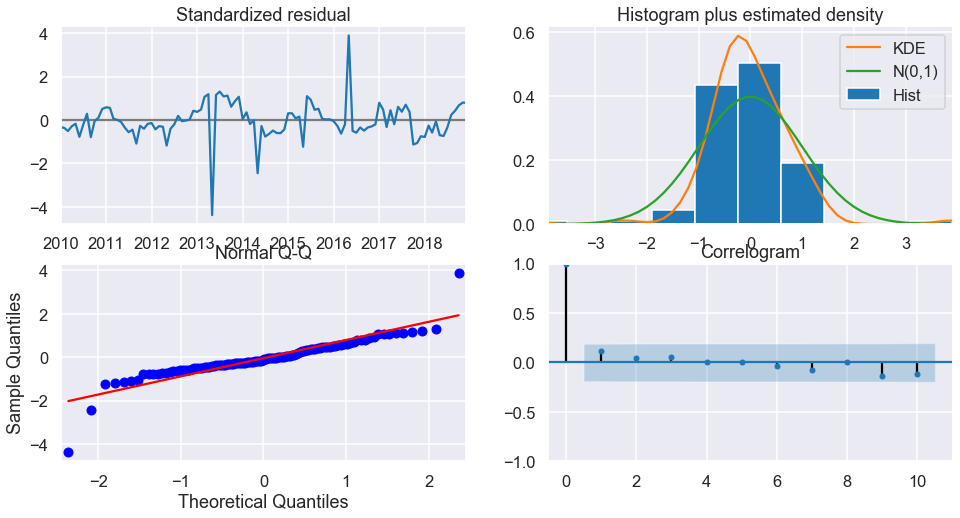

In [6]:

mod = sm.tsa.statespace.SARIMAX(train_df['MBA_course_registration'],
                                exog=train_df[['MBA_Tuition', 'Weekly_Earnings', 'UnempRate']],
                                trend='ct',
                                order=(0, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [47]:
import matplotlib as mpl
sns.set_style('white')
sns.set_context('talk')

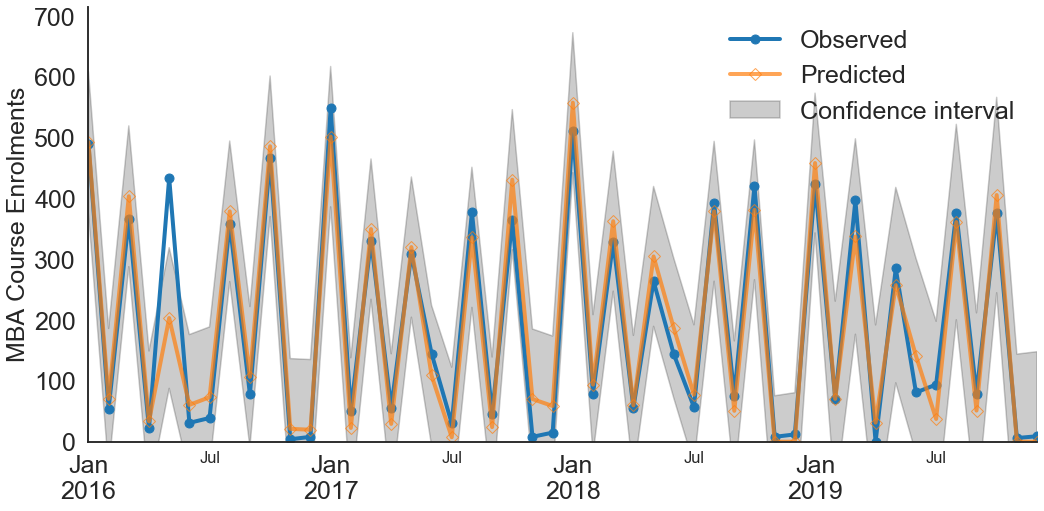

In [106]:
pred = results.get_prediction(start =pd.to_datetime('2016-01-01'), 
                                     end =pd.to_datetime('2019-11-30'),
                                     exog=test_df[['MBA_Tuition', 'Weekly_Earnings', 'UnempRate']],
                                     dynamic=False)

pred_ci = pred.conf_int()

ax = df.MBA_course_registration['2016':'2019'].plot(label='Observed',
                                                    linewidth=4,
                                                    marker='o')
pred.predicted_mean[pred.predicted_mean < 0] = 0
pred.predicted_mean.plot(ax=ax, 
                         label='Predicted', 
                         alpha=.7, 
                         figsize=(17, 8),
                         linewidth=4, 
                         marker='D',
                         fillstyle='none')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('')
ax.set_ylabel("MBA Course Enrolments")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.collections[0].set_label('Confidence interval')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(ymin=0)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
    
plt.legend(frameon=False, loc=1, prop={'size': 25})

plt.savefig(r'C:\Users\inyamekye\Documents\Tuition Analysis\2020\MBA Predctions.png',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0.1)

plt.show()

In [7]:
def predict(exo):
    predictions = results.predict(start =pd.to_datetime('2019-01-01'),
                                  end = pd.to_datetime('2020-02-28'),
                                  exog = exo,
                                  dynamic=False)
    return predictions

In [9]:
predictions1 = predict(exo = test_df[['MBA_Tuition', 'Weekly_Earnings', 'UnempRate']])
predictions1 = pd.DataFrame(predictions1)
predictions1['Actual'] = df.MBA_course_registration['2019-01-01':]
predictions1.rename(columns={0:'Pred'}, inplace=True)
predictions1 = predictions1[['Actual','Pred']]
predictions1

,Actual,Pred
2019-01-01,424.0,458.535681
2019-02-01,71.0,70.389690
2019-03-01,397.0,337.636620
2019-04-01,0.0,31.385743
2019-05-01,285.0,257.681241
2019-06-01,81.0,141.217736
2019-07-01,94.0,37.346275
2019-08-01,377.0,361.413368
2019-09-01,79.0,51.221215
2019-10-01,376.0,405.858451


### Evaluating Model

In [67]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions1['Pred'], predictions1['Actual'])
print("Root Mean Square Error:", error)

Root Mean Square Error: 36.714498876001805


### Sensitivity of model to changes in Tuition

In [68]:
test_df['MBA_Tuition1'] = test_df['MBA_Tuition']*1.01
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MBA_course_registration,MBA_Tuition,WCS,UnempRate,Weekly_Earnings,MBA_Tuition1,MBA_Tuition7,MBA_Tuition14
Date,,,,,,,,
2019-01-01,424.0,3018.183744,35.320267,0.058720,1084.728633,3048.365581,3229.456606,3440.729468
2019-02-01,71.0,2981.537628,46.111600,0.061388,1097.125735,3011.353004,3190.245262,3398.952896
2019-03-01,397.0,2958.782827,48.666981,0.060061,1110.113167,2988.370655,3165.897625,3373.012423
2019-04-01,0.0,2951.158231,53.616232,0.058468,1086.100786,2980.669814,3157.739308,3364.320384
2019-05-01,285.0,2951.579543,52.808199,0.056201,1092.822660,2981.095339,3158.190111,3364.800679


In [69]:
predictions2 = predict(exo = test_df[['MBA_Tuition1', 'Weekly_Earnings', 'UnempRate']])
predictions2 = pd.DataFrame(predictions2)
predictions2.rename(columns={0:'Pred1'}, inplace=True)
predictions2.head()

,Pred1
2019-01-01,457.557651
2019-02-01,69.423535
2019-03-01,336.677839
2019-04-01,30.429432
2019-05-01,256.724794


In [70]:
test_df['MBA_Tuition7'] = test_df['MBA_Tuition']*1.07
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MBA_course_registration,MBA_Tuition,WCS,UnempRate,Weekly_Earnings,MBA_Tuition1,MBA_Tuition7,MBA_Tuition14
Date,,,,,,,,
2019-01-01,424.0,3018.183744,35.320267,0.058720,1084.728633,3048.365581,3229.456606,3440.729468
2019-02-01,71.0,2981.537628,46.111600,0.061388,1097.125735,3011.353004,3190.245262,3398.952896
2019-03-01,397.0,2958.782827,48.666981,0.060061,1110.113167,2988.370655,3165.897625,3373.012423
2019-04-01,0.0,2951.158231,53.616232,0.058468,1086.100786,2980.669814,3157.739308,3364.320384
2019-05-01,285.0,2951.579543,52.808199,0.056201,1092.822660,2981.095339,3158.190111,3364.800679


In [71]:
predictions7 = predict(exo = test_df[['MBA_Tuition7', 'Weekly_Earnings', 'UnempRate']])
predictions7 = pd.DataFrame(predictions7)
predictions7.rename(columns={0:'Pred7'}, inplace=True)
predictions7.head()

,Pred7
2019-01-01,451.689471
2019-02-01,63.626605
2019-03-01,330.925150
2019-04-01,24.691568
2019-05-01,250.986111


In [72]:
test_df['MBA_Tuition14'] = test_df['MBA_Tuition']*1.14
test_df.head()

C:\Users\inyamekye\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MBA_course_registration,MBA_Tuition,WCS,UnempRate,Weekly_Earnings,MBA_Tuition1,MBA_Tuition7,MBA_Tuition14
Date,,,,,,,,
2019-01-01,424.0,3018.183744,35.320267,0.058720,1084.728633,3048.365581,3229.456606,3440.729468
2019-02-01,71.0,2981.537628,46.111600,0.061388,1097.125735,3011.353004,3190.245262,3398.952896
2019-03-01,397.0,2958.782827,48.666981,0.060061,1110.113167,2988.370655,3165.897625,3373.012423
2019-04-01,0.0,2951.158231,53.616232,0.058468,1086.100786,2980.669814,3157.739308,3364.320384
2019-05-01,285.0,2951.579543,52.808199,0.056201,1092.822660,2981.095339,3158.190111,3364.800679


In [73]:
predictions14 = predict(exo = test_df[['MBA_Tuition14', 'Weekly_Earnings', 'UnempRate']])
predictions14 = pd.DataFrame(predictions14)
predictions14.rename(columns={0:'Pred14'}, inplace=True)
predictions14.head()

,Pred14
2019-01-01,444.843261
2019-02-01,56.863520
2019-03-01,324.213681
2019-04-01,17.997394
2019-05-01,244.290980


In [75]:
predictions_wip = pd.concat([predictions1, predictions2, predictions7, predictions14], axis=1, sort=True)
predictions_wip[predictions_wip < 0] = 0
predictions_wip.loc['Total'] = predictions_wip.sum(axis=0)
predictions_wip['Pred1-Pred %Change'] = (predictions_wip['Pred1']/predictions_wip['Pred'])-1
predictions_wip['Pred7-Pred %Change'] = (predictions_wip['Pred7']/predictions_wip['Pred'])-1
predictions_wip['Pred14-Pred %Change'] = (predictions_wip['Pred14']/predictions_wip['Pred'])-1
predictions_wip['Pred7/Pred1'] = predictions_wip['Pred7-Pred %Change']/predictions_wip['Pred1-Pred %Change']
predictions_wip['Pred14/Pred1'] = predictions_wip['Pred14-Pred %Change']/predictions_wip['Pred1-Pred %Change']
predictions_wip

,Actual,Pred,Pred1,Pred7,Pred14,Pred1-Pred %Change,Pred7-Pred %Change,Pred14-Pred %Change,Pred7/Pred1,Pred14/Pred1
2019-01-01 00:00:00,424.0,458.535681,457.557651,451.689471,444.843261,-0.002133,-0.014931,-0.029861,7.0,14.0
2019-02-01 00:00:00,71.0,70.389690,69.423535,63.626605,56.863520,-0.013726,-0.096081,-0.192161,7.0,14.0
2019-03-01 00:00:00,397.0,337.636620,336.677839,330.925150,324.213681,-0.002840,-0.019878,-0.039756,7.0,14.0
2019-04-01 00:00:00,0.0,31.385743,30.429432,24.691568,17.997394,-0.030470,-0.213287,-0.426574,7.0,14.0
2019-05-01 00:00:00,285.0,257.681241,256.724794,250.986111,244.290980,-0.003712,-0.025982,-0.051964,7.0,14.0
2019-06-01 00:00:00,81.0,141.217736,140.256486,134.488988,127.760240,-0.006807,-0.047648,-0.095296,7.0,14.0
2019-07-01 00:00:00,94.0,37.346275,36.392893,30.672601,23.998926,-0.025528,-0.178697,-0.357394,7.0,14.0
2019-08-01 00:00:00,377.0,361.413368,360.456446,354.714914,348.016459,-0.002648,-0.018534,-0.037068,7.0,14.0
2019-09-01 00:00:00,79.0,51.221215,50.262761,44.512039,37.802862,-0.018712,-0.130984,-0.261969,7.0,14.0
2019-10-01 00:00:00,376.0,405.858451,404.906051,399.191652,392.524853,-0.002347,-0.016426,-0.032853,7.0,14.0


### Converting predictions to original scale

predictions_final = np.exp(predictions_wip)
predictions_final.loc['Total'] = predictions_final.sum(axis=0)
predictions_final['Pred1-Pred %Change'] = (predictions_final['Pred1']/predictions_final['Pred'])-1
predictions_final['Pred7-Pred %Change'] = (predictions_final['Pred7']/predictions_final['Pred'])-1
predictions_final['Pred7/Pred1'] = predictions_final['Pred7-Pred %Change']/predictions_final['Pred1-Pred %Change']
predictions_final